# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
# load data & summarise in text using 1 pandas function
bike_data = pd.read_csv("SeoulBikeData.csv")

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Summary of data:
* Seoul Bike Data has total 8760 entries with 13 features and 1 target (Rented Bike Count).
* Features name are not friendly to use and some features are incorrect data type => convert them to correct data type and friendlier names.
* Check NA data by using summary numeric data and check level of category data.

In [3]:
# rename
rename_dict = {
    'Date': 'date',
    'Rented Bike Count': 'number_rented_bike',
    'Hour': 'hour',
    'Temperature (C)': 'temperature',
    'Humidity (%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature (C)': 'dew_temperature',
    'Solar Radiation (MJ/m2)': 'solar_radiation',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'functioning_day'
    }

bike_data.rename(columns=rename_dict, inplace=True)


In [4]:
# convert to correct data types
bike_data['date'] = pd.to_datetime(bike_data['date'], format='%d/%m/%Y')

bike_data['solar_radiation'] = pd.to_numeric(bike_data['solar_radiation'], errors='coerce')
bike_data['rainfall'] = pd.to_numeric(bike_data['rainfall'], errors='coerce')
bike_data['snowfall'] = pd.to_numeric(bike_data['snowfall'], errors='coerce')

for features in bike_data.select_dtypes(include=['object']).columns:
    bike_data[features] = bike_data[features].astype('category')

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                8760 non-null   datetime64[ns]
 1   number_rented_bike  8760 non-null   int64         
 2   hour                8760 non-null   int64         
 3   temperature         8760 non-null   float64       
 4   humidity            8760 non-null   float64       
 5   wind_speed          8760 non-null   float64       
 6   visibility          8760 non-null   int64         
 7   dew_temperature     8760 non-null   float64       
 8   solar_radiation     8759 non-null   float64       
 9   rainfall            8739 non-null   float64       
 10  snowfall            8739 non-null   float64       
 11  seasons             8760 non-null   category      
 12  holiday             8760 non-null   category      
 13  functioning_day     8760 non-null   category    

After converting to correct data types, features 'solar_radiation', 'rainfall', 'snowfall' have some missing values need to be cleaned later.

In [5]:
# check numeric data
bike_data.describe()

,date,number_rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temperature,solar_radiation,rainfall,snowfall
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8739.000000,8739.000000
mean,2018-05-31 23:59:59.999999744,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813,0.569017,0.149045,0.086486
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000
std,NaN,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369,0.869311,1.129524,1.145001


In [6]:
# check categorical data
for features in bike_data.select_dtypes(include=['category']).columns:
    print(f'{features}: {bike_data[features].unique()}]\n')

seasons: ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']]

holiday: ['No Holiday', 'Holiday']
Categories (2, object): ['Holiday', 'No Holiday']]

functioning_day: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']]



After checking the data, we visualise it to see any strange values.

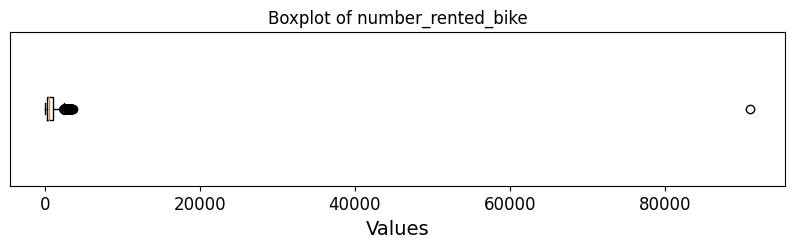

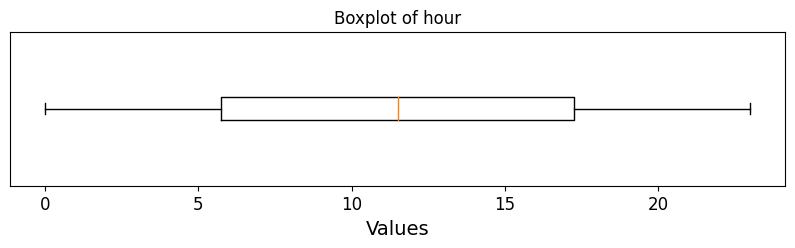

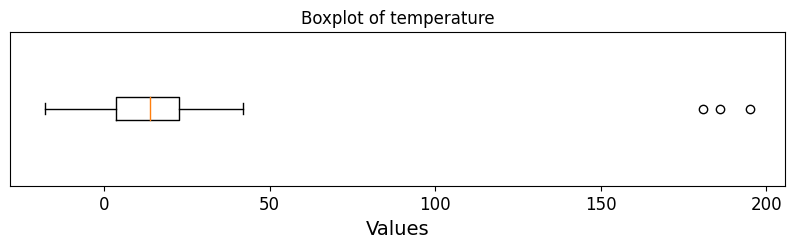

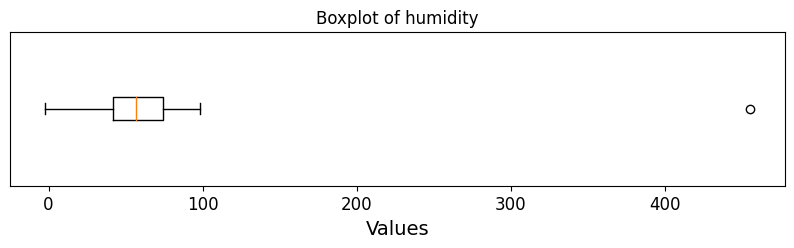

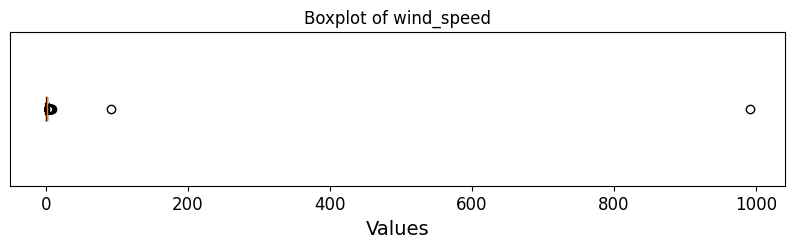

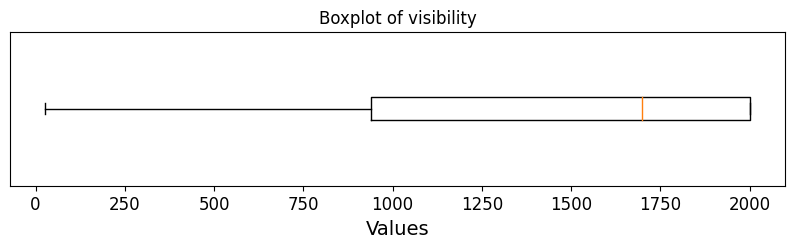

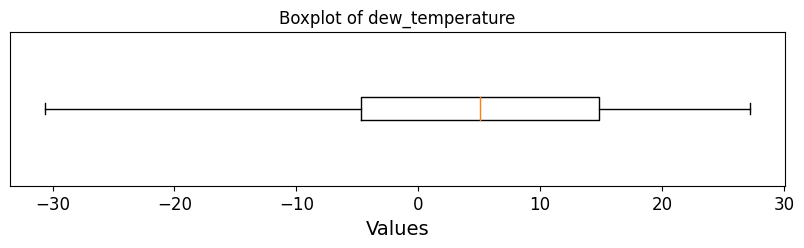

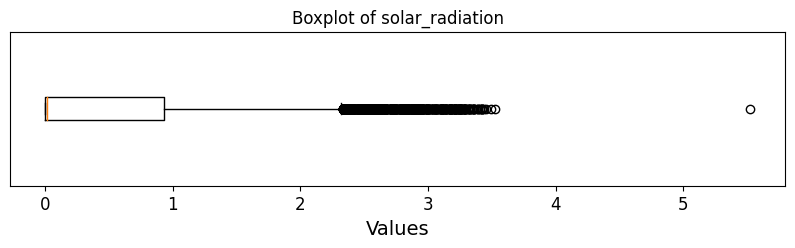

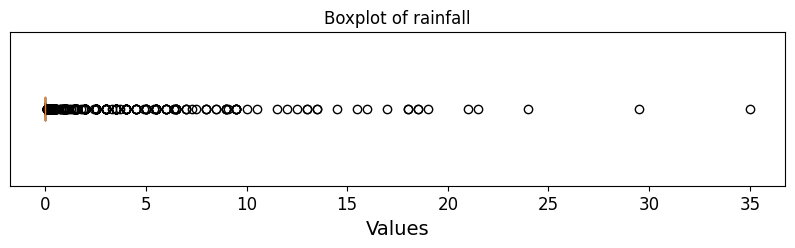

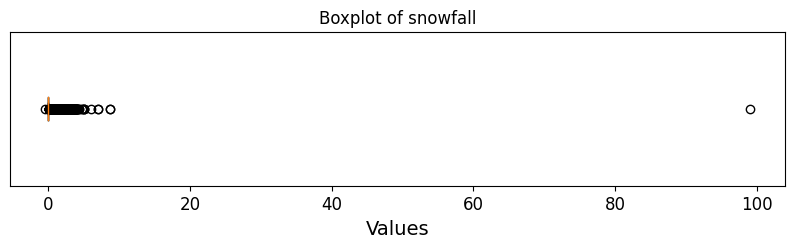

In [7]:
# visualise numeric data
for col in bike_data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 2))
    plt.boxplot(bike_data[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')
    plt.yticks([])
    plt.show()

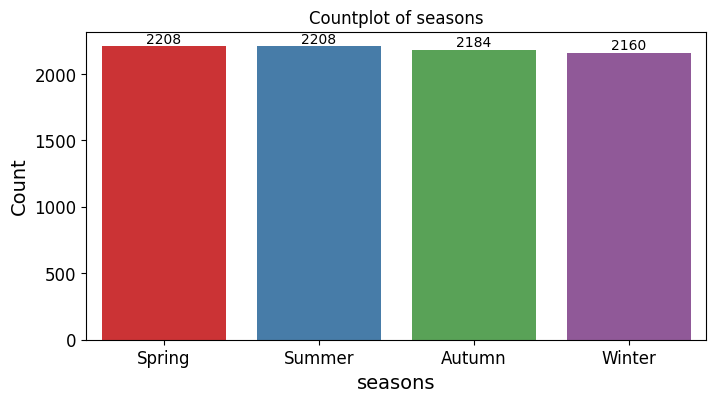

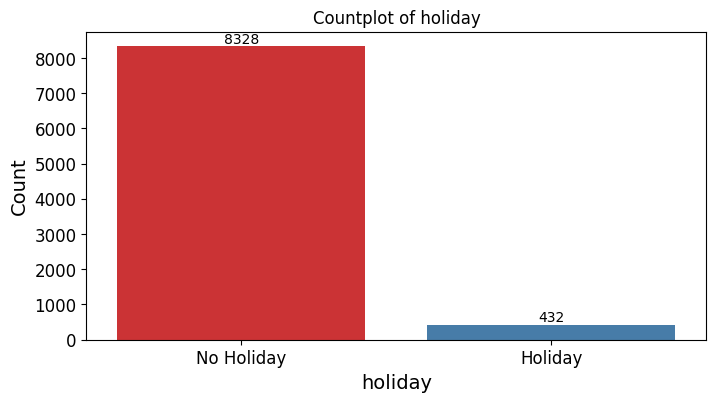

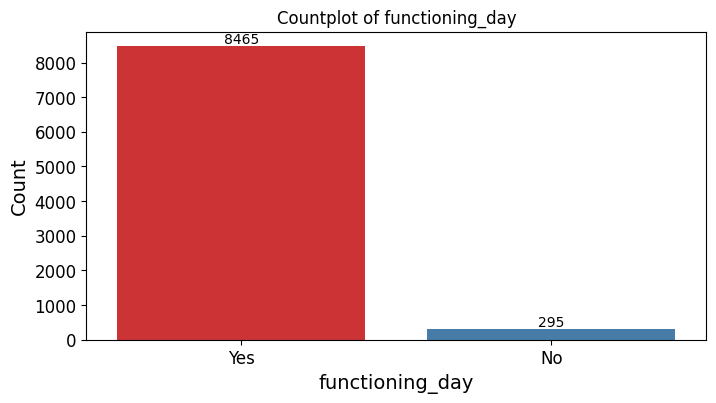

In [8]:
# visualise categorical data
import seaborn as sns
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

for feat in bike_data.select_dtypes(include=['category']).columns:
    plt.figure(figsize=(8, 4))
    order = bike_data[feat].value_counts().index
    
    ax = sns.countplot(x=feat, data=bike_data, palette="Set1", order=order)
    plt.title(f'Countplot of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()

With previous plots, we can see some unusual/outliers need to be removed when cleaning data. Moreover, we believe these data points should be removed after checking with data reference of Seoul weather in 2017-2018 (https://weatherspark.com/y/142033/Average-Weather-in-Seoul-South-Korea-Year-Round).

* Number of rented bikes per hour: 90,997 bikes
* Temperature: more than 50 Celsius degree is impossible
* Humidity: should be in the range from 0 - 100; negative values or values higher than 100 are invalid
* Windspeed: more than 20m/s is impossible
* Snowfall: more than 20cm is impossible.



### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [9]:
# remove rows where business is closed and delete the functioning_day
bike_data = bike_data[bike_data['functioning_day'] == 'Yes']
bike_data.drop(columns=['functioning_day'], inplace=True)

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                8465 non-null   datetime64[ns]
 1   number_rented_bike  8465 non-null   int64         
 2   hour                8465 non-null   int64         
 3   temperature         8465 non-null   float64       
 4   humidity            8465 non-null   float64       
 5   wind_speed          8465 non-null   float64       
 6   visibility          8465 non-null   int64         
 7   dew_temperature     8465 non-null   float64       
 8   solar_radiation     8464 non-null   float64       
 9   rainfall            8444 non-null   float64       
 10  snowfall            8444 non-null   float64       
 11  seasons             8465 non-null   category      
 12  holiday             8465 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(7), int64(

In [10]:
# convert seasons and holiday to a one hot encoded format, then remove the original seasons and holiday features
season_dummies = pd.get_dummies(bike_data['seasons'], prefix='season')
holiday_dummies = pd.get_dummies(bike_data['holiday'], prefix='holiday')

bike_data = pd.concat([bike_data, season_dummies, holiday_dummies], axis=1)
bike_data.drop(['seasons', 'holiday'], axis=1, inplace=True)

print(bike_data.head())

        date  number_rented_bike  hour  temperature  humidity  wind_speed  \
0 2017-12-01                 254     0         -5.2      37.0         2.2   
1 2017-12-01                 204     1         -5.5      38.0         0.8   
2 2017-12-01                 173     2         -6.0      39.0         1.0   
3 2017-12-01                 107     3         -6.2      40.0         0.9   
4 2017-12-01                  78     4         -6.0      36.0         2.3   

   visibility  dew_temperature  solar_radiation  rainfall  snowfall  \
0        2000            -17.6              0.0       0.0       0.0   
1        2000            -17.6              0.0       0.0       0.0   
2        2000            -17.7              0.0       0.0       0.0   
3        2000            -17.6              0.0       0.0       0.0   
4        2000            -18.6              0.0       0.0       0.0   

   season_Autumn  season_Spring  season_Summer  season_Winter  \
0          False          False          Fals

In [11]:
# replace the 'Date' feature with a binary 'weekday' feature (1 for a weekday and 0 for weekend)
bike_data['weekday'] = bike_data['date'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)
bike_data.drop('date', axis=1, inplace=True)

print(bike_data.head())

   number_rented_bike  hour  temperature  humidity  wind_speed  visibility  \
0                 254     0         -5.2      37.0         2.2        2000   
1                 204     1         -5.5      38.0         0.8        2000   
2                 173     2         -6.0      39.0         1.0        2000   
3                 107     3         -6.2      40.0         0.9        2000   
4                  78     4         -6.0      36.0         2.3        2000   

   dew_temperature  solar_radiation  rainfall  snowfall  season_Autumn  \
0            -17.6              0.0       0.0       0.0          False   
1            -17.6              0.0       0.0       0.0          False   
2            -17.7              0.0       0.0       0.0          False   
3            -17.6              0.0       0.0       0.0          False   
4            -18.6              0.0       0.0       0.0          False   

   season_Spring  season_Summer  season_Winter  holiday_Holiday  \
0          False   

In [12]:
# convert remaining non-numerical features to a numerical format
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_rented_bike  8465 non-null   int64  
 1   hour                8465 non-null   int64  
 2   temperature         8465 non-null   float64
 3   humidity            8465 non-null   float64
 4   wind_speed          8465 non-null   float64
 5   visibility          8465 non-null   int64  
 6   dew_temperature     8465 non-null   float64
 7   solar_radiation     8464 non-null   float64
 8   rainfall            8444 non-null   float64
 9   snowfall            8444 non-null   float64
 10  season_Autumn       8465 non-null   bool   
 11  season_Spring       8465 non-null   bool   
 12  season_Summer       8465 non-null   bool   
 13  season_Winter       8465 non-null   bool   
 14  holiday_Holiday     8465 non-null   bool   
 15  holiday_No Holiday  8465 non-null   bool   
 16  weekday    

In [13]:
# check all the data again
bike_data.describe()

,number_rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temperature,solar_radiation,rainfall,snowfall,weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8444.000000,8444.000000,8465.000000
mean,739.789014,11.507029,12.836090,58.190408,1.854247,1433.873479,3.944997,0.567771,0.149491,0.089507,0.711636
std,1172.685973,6.920899,12.545382,20.943092,10.847528,609.051229,13.242399,0.868830,1.126914,1.164716,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,1.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000,1.000000


All data is now numerical format (bool is still numeric). Identify and fix any outliers and errors in the data: some unsual/invalid data still presents => For target, remove. For features, replace these values with np.nan:

* Number of rented bikes per hour: 90,997 bikes => target, remove this invalid value for target instead of imputation.

Features:

* Temperature: more than 50 Celsius degree is impossible
* Humidity: should be in the range from 0 - 100; negative values or values higher than 100 are invalid
* Windspeed: more than 20m/s is impossible
* Snowfall: more than 20cm is impossible.

In [14]:
# fix outliers
bike_data = bike_data[bike_data['number_rented_bike'] <= 10000]

bike_data.loc[bike_data['temperature'] > 50, 'temperature'] = np.nan  # Impossible temperature values
bike_data.loc[(bike_data['humidity'] < 0) | (bike_data['humidity'] > 100), 'humidity'] = np.nan  # Invalid humidity values
bike_data.loc[bike_data['wind_speed'] > 20, 'wind_speed'] = np.nan  # Impossible wind speed values
bike_data.loc[bike_data['snowfall'] > 20, 'snowfall'] = np.nan  # Impossible snowfall values

bike_data.describe()

,number_rented_bike,hour,temperature,humidity,wind_speed,visibility,dew_temperature,solar_radiation,rainfall,snowfall,weekday
count,8464.000000,8464.000000,8461.000000,8462.000000,8462.000000,8464.000000,8464.000000,8463.000000,8443.000000,8442.000000,8464.000000
mean,729.125354,11.507443,12.775818,58.148546,1.726814,1433.870274,3.945983,0.567814,0.149508,0.077801,0.711602
std,642.382517,6.921203,12.108932,20.486300,1.037857,609.087140,13.242871,0.868872,1.126980,0.444666,0.453044
min,2.000000,0.000000,-17.800000,0.000000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,1.000000
max,3556.000000,23.000000,42.000000,98.000000,9.200000,2000.000000,27.200000,5.520000,35.000000,8.800000,1.000000


In [30]:
# we save data to cleaned data and use it for further analysis later
bike_data.to_csv('CleanedSeoulBikeData.csv', index=False)

In [16]:
# we load new cleaned data for futher processing and analysis
cleaned_bike = pd.read_csv("CleanedSeoulBikeData.csv")

print(cleaned_bike.info())
print(cleaned_bike.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8464 entries, 0 to 8463
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_rented_bike  8464 non-null   int64  
 1   hour                8464 non-null   int64  
 2   temperature         8461 non-null   float64
 3   humidity            8462 non-null   float64
 4   wind_speed          8462 non-null   float64
 5   visibility          8464 non-null   int64  
 6   dew_temperature     8464 non-null   float64
 7   solar_radiation     8463 non-null   float64
 8   rainfall            8443 non-null   float64
 9   snowfall            8442 non-null   float64
 10  season_Autumn       8464 non-null   bool   
 11  season_Spring       8464 non-null   bool   
 12  season_Summer       8464 non-null   bool   
 13  season_Winter       8464 non-null   bool   
 14  holiday_Holiday     8464 non-null   bool   
 15  holiday_No Holiday  8464 non-null   bool   
 16  weekda

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [17]:
# split data to training and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cleaned_bike, test_size= 0.2, random_state=2729)

In [18]:
# define X, y train
y_train = train_set['number_rented_bike'].copy()
X_train = train_set.drop(['number_rented_bike'], axis=1)

print(X_train.describe())
print(y_train.describe())


              hour  temperature     humidity   wind_speed   visibility  \
count  6771.000000  6769.000000  6769.000000  6769.000000  6771.000000   
mean     11.523556    12.859521    58.281282     1.737110  1430.496825   
std       6.911222    12.128314    20.534842     1.038945   612.982756   
min       0.000000   -17.500000     0.000000    -0.700000    27.000000   
25%       6.000000     3.100000    42.000000     1.000000   923.000000   
50%      12.000000    13.500000    57.000000     1.500000  1695.000000   
75%      17.000000    22.800000    74.000000     2.400000  2000.000000   
max      23.000000    42.000000    98.000000     9.200000  2000.000000   

       dew_temperature  solar_radiation     rainfall     snowfall      weekday  
count      6771.000000      6770.000000  6759.000000  6758.000000  6771.000000  
mean          4.041633         0.571504     0.143719     0.075718     0.713484  
std          13.252439         0.875681     1.060402     0.441285     0.452167  
min      

In [19]:
# define X, y test
y_test = test_set['number_rented_bike'].copy()
X_test = test_set.drop(['number_rented_bike'], axis=1)

print(X_test.describe())
print(y_test.describe())

              hour  temperature     humidity   wind_speed   visibility  \
count  1693.000000  1692.000000  1693.000000  1693.000000  1693.000000   
mean     11.443001    12.440957    57.617838     1.685647  1447.362079   
std       6.962656    12.028819    20.288401     1.032779   593.237087   
min       0.000000   -17.800000     0.000000     0.000000    38.000000   
25%       5.000000     2.700000    42.000000     0.900000   990.000000   
50%      11.000000    12.950000    57.000000     1.500000  1666.000000   
75%      18.000000    22.125000    73.000000     2.300000  2000.000000   
max      23.000000    39.400000    98.000000     7.200000  2000.000000   

       dew_temperature  solar_radiation     rainfall     snowfall      weekday  
count      1693.000000      1693.000000  1684.000000  1684.000000  1693.000000  
mean          3.563438         0.553060     0.172743     0.086164     0.704076  
std          13.201508         0.841186     1.361961     0.458023     0.456592  
min      

In [20]:
# imputation and pre-processing pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

num_feat = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_temperature', 'solar_radiation', 'rainfall', 'snowfall']
cate_feat = ['season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'holiday_Holiday', 'holiday_No Holiday', 'weekday']

# use median imputation for missing values of numerical data then scaling them
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# categorical data is boolean values, can use them directly without scaling
cate_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# combine 2 pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feat),
    ('cat', cate_pipeline, cate_feat)
])

# final pipeline with a linear regression model
bike_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

# print steps in the pipeline
for name, step in bike_pipeline.named_steps.items():
    print(f"Step: {name} => {step}")

Step: preprocessor => ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['temperature', 'humidity', 'wind_speed',
                                  'visibility', 'dew_temperature',
                                  'solar_radiation', 'rainfall', 'snowfall']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['season_Autumn', 'season_Spring',
                                  'season_Summer', 'season_Winter',
                                

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [21]:
# split data before creating the pipeline, this section only used for fitting data and make prediction based on training data
from sklearn.metrics import mean_squared_error

# fit the pipeline to the training data
bike_pipeline.fit(X_train, y_train)

# predict on the training set
y_train_pred = bike_pipeline.predict(X_train)

# calculate RMSE for the training predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse:.2f}")

# baseline prediction using the mean of the training targets
y_train_baseline = np.full_like(y_train, y_train.mean())

# calculate RMSE for the baseline predictions
baseline_rmse = np.sqrt(mean_squared_error(y_train, y_train_baseline))
print(f"Baseline RMSE: {baseline_rmse:.2f}")


Training RMSE: 466.69
Baseline RMSE: 639.20


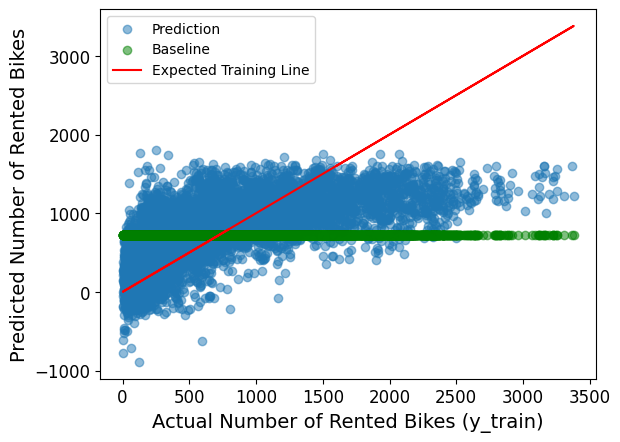

In [22]:
# plotting to see performance
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Prediction')
plt.scatter(y_train, y_train_baseline, alpha=0.5, label='Baseline', color='green')

plt.plot(y_train, y_train, 'r-', label='Expected Training Line')
plt.xlabel('Actual Number of Rented Bikes (y_train)')
plt.ylabel('Predicted Number of Rented Bikes')
plt.legend()
plt.show()

Overall, the performance after training data is:
* Linear regression RSME (466.69) is better than the baseline (mean of y - 639.20). However, for low rental days, an error of 467 bikes in prediction is significant and  overestimations; while in maximum rental days, the error is  a more accurate.
* Predictions spread with higher actual rental numbers - linear regression might not fully capture the impact from features - suggesting use another complex model to predict.

## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


### 1st ChatGPT prompt

I want to implement a quick algorithm, if there're many ways to accomplish this, list the best alternative ways to implement it and compare/contrast them. Prompt me for which approach I would like to use with these inputs:

Using sklearn pipelines that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

Information about data and current model performance until now:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8464 entries, 0 to 8463
Data columns (total 17 columns):
    Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_rented_bike  8464 non-null   int64  
 1   hour                8464 non-null   int64  
 2   temperature         8461 non-null   float64
 3   humidity            8462 non-null   float64
 4   wind_speed          8462 non-null   float64
 5   visibility          8464 non-null   int64  
 6   dew_temperature     8464 non-null   float64
 7   solar_radiation     8463 non-null   float64
 8   rainfall            8443 non-null   float64
 9   snowfall            8442 non-null   float64
 10  season_Autumn       8464 non-null   bool   
 11  season_Spring       8464 non-null   bool   
 12  season_Summer       8464 non-null   bool   
 13  season_Winter       8464 non-null   bool   
 14  holiday_Holiday     8464 non-null   bool   
 15  holiday_No Holiday  8464 non-null   bool   
 16  weekday             8464 non-null   int64 

train_set, test_set = train_test_split(cleaned_bike, test_size= 0.2, random_state=2729)
y_train = train_set['number_rented_bike'].copy()
X_train = train_set.drop(['number_rented_bike'], axis=1)
y_test = test_set['number_rented_bike'].copy()
X_test = test_set.drop(['number_rented_bike'], axis=1)
num_feat = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_temperature', 'solar_radiation', 'rainfall', 'snowfall']
cate_feat = ['season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'holiday_Holiday', 'holiday_No Holiday', 'weekday']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cate_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feat),
    ('cat', cate_pipeline, cate_feat)
])

bike_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

bike_pipeline.fit(X_train, y_train)

y_train_pred = bike_pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse:.2f}")
y_train_baseline = np.full_like(y_train, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, y_train_baseline))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

Output:
Training RMSE: 470.61
Baseline RMSE: 646.51

Comment:
Overall, the performance after training data is:
* Linear regression is better than the baseline - lower RMSE by ~176 bikes. However, for low rental days, an error of 470 bikes in prediction is significant and  overestimations; while in maximum rental days, the error is  a more accurate.
* Predictions spread with higher actual rental numbers - linear regression might not fully capture the impact from features - suggesting use another complex model to predict.


### 2nd  ChatGPT prompts

All the code below from Step 3 is based on ChatGPT results, using version 4.0 and input more these promts:

Using approach 1 - sequential pipeline execution to implement. For Linear model, no need to optimised by using regularization (follow instruction from Mark in Discussion board https://myuni.adelaide.edu.au/courses/92865/discussion_topics/968481), instead we'll try to use Polynomial. For both model, evaluate by using K-Fold loop with average RMSE. Here the step of for all optimisation:

- Split data to training (80%) and test set (20%) - already split
- Split training data to K-Fold 10 CV (training and validation set)
- Train model by using training set
- Optimise model by using validation set
- Train data again with best parameter with both training and validation set
- Use final models to predict test set
- Evaluate performance of all the steps

In [23]:
# 1. Define pipeline for LR and SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

num_feat = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_temperature', 'solar_radiation', 'rainfall', 'snowfall']
cate_feat = ['season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter', 'holiday_Holiday', 'holiday_No Holiday', 'weekday']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cate_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feat),
    ('cat', cate_pipeline, cate_feat)
])

# Add LinearRegression model
poly_linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Add SVR model
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

In [24]:
# 2. Define k-fold CV & scoring metric
kfolds = KFold(n_splits=10, shuffle=True, random_state=27)
scoring = 'neg_root_mean_squared_error'

In [25]:
# 3. Function to evaluate and display results
def evaluate_model(pipeline, param_grid, X_train, y_train, kfolds):
    # Baseline RMSE
    baseline_scores = cross_val_score(pipeline, X_train, y_train, scoring=scoring, cv=kfolds)
    baseline_rmse_mean = -baseline_scores.mean()
    baseline_rmse_std = baseline_scores.std()

    # GridSearchCV to find best model
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfolds, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_pipeline = grid_search.best_estimator_

    # RMSE after optimization
    optimized_scores = cross_val_score(best_pipeline, X_train, y_train, scoring=scoring, cv=kfolds)
    optimized_rmse_mean = -optimized_scores.mean()
    optimized_rmse_std = optimized_scores.std()

    return baseline_rmse_mean, baseline_rmse_std, optimized_rmse_mean, optimized_rmse_std, best_pipeline

def display_rmse_results(baseline_mean, baseline_std, optimized_mean, optimized_std, model_name):
    print(f"{model_name} Baseline RMSE:")
    print(f"Mean RMSE: {baseline_mean:.2f}, Std Dev RMSE: {baseline_std:.2f}")
    print(f"{model_name} Optimized RMSE:")
    print(f"Mean RMSE: {optimized_mean:.2f}, Std Dev RMSE: {optimized_std:.2f}")
    print()

In [26]:
# 4a. Evaluation Polynomial Linear Regression
poly_linear_baseline_rmse_mean, poly_linear_baseline_rmse_std, poly_linear_optimized_rmse_mean, poly_linear_optimized_rmse_std, poly_linear_best_pipeline = evaluate_model(poly_linear_pipeline, {}, X_train, y_train, kfolds)

display_rmse_results(poly_linear_baseline_rmse_mean, poly_linear_baseline_rmse_std, poly_linear_optimized_rmse_mean, poly_linear_optimized_rmse_std, "Polynomial Linear Regression")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Polynomial Linear Regression Baseline RMSE:
Mean RMSE: 410.07, Std Dev RMSE: 15.35
Polynomial Linear Regression Optimized RMSE:
Mean RMSE: 410.07, Std Dev RMSE: 15.35



In [27]:
# 4b. Evaluation SVR
svr_param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5]
}
svr_baseline_rmse_mean, svr_baseline_rmse_std, svr_optimized_rmse_mean, svr_optimized_rmse_std, svr_best_pipeline = evaluate_model(svr_pipeline, svr_param_grid, X_train, y_train, kfolds)

display_rmse_results(svr_baseline_rmse_mean, svr_baseline_rmse_std, svr_optimized_rmse_mean, svr_optimized_rmse_std, "SVR")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
SVR Baseline RMSE:
Mean RMSE: 542.41, Std Dev RMSE: 10.82
SVR Optimized RMSE:
Mean RMSE: 439.86, Std Dev RMSE: 11.67



In [28]:
# Train final models with optimized parameters
poly_linear_best_pipeline.fit(X_train, y_train)
svr_best_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_poly_linear = poly_linear_best_pipeline.predict(X_test)
y_pred_svr = svr_best_pipeline.predict(X_test)

# Function to evaluate RMSE on test set
def evaluate_test_performance(y_true, y_pred):
    test_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return test_rmse

# Evaluate RMSE on test set for Polynomial Linear Regression
test_rmse_poly_linear = evaluate_test_performance(y_test, y_pred_poly_linear)

# Evaluate RMSE on test set for SVR
test_rmse_svr = evaluate_test_performance(y_test, y_pred_svr)

# Display test set performance
print(f"Polynomial Linear Regression Test RMSE: {test_rmse_poly_linear:.2f}")
print(f"SVR Test RMSE: {test_rmse_svr:.2f}")

# Calculate generalization error (difference in RMSE between training/validation and test set)
generalization_error_linear = test_rmse_poly_linear - poly_linear_optimized_rmse_mean
generalization_error_svr = test_rmse_svr - svr_optimized_rmse_mean

print(f"Linear Regression Generalization Error: {generalization_error_linear:.2f}")
print(f"SVR Generalization Error: {generalization_error_svr:.2f}")

Polynomial Linear Regression Test RMSE: 426.80
SVR Test RMSE: 453.43
Linear Regression Generalization Error: 16.73
SVR Generalization Error: 13.57


### Summary

Using a simple Linear Regression model, the RMSE is 466.69. After applying cross-validation and optimization, both Polynomial Linear Regression and SVR have better performance with lower test RMSEs compared to LR results. However, each model has its challenges:

* Polynomial Linear Regression: This model was adapted to better fit complex data patterns, reducing the RMSE to 410.07 in validation set and 426.80 in testing set. However, its error is larger in testing set indicating not perform well on unseen data and its accuracy on days with very few bike rentals remains problematic.

* Support Vector Regression (SVR): Baseline RSME is 542.41 and optimised RSME is 439.86. While optimised SVR RSME better than simple LR RSME, it still didn't perform as well as Polynomial Linear Regression and struggled with high prediction errors.

* Both Polynomial LR and SVR models after optimisation do not perform well on unseen data, illustrating by high % of generalisation error > 0. These models might not suitable to predict the number of rented bike per hour.

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

To improve the models:
* Consider different models might better capture the data
* Address outliers in variables like the number of bikes rented per hour and other features in boxplots below
* Explore new ways to handle missing or invalid data instead of imputation by median
* Select high important features and remove redundant ones: possibly represent snowfall by visibility, solar radiation by rainfall.

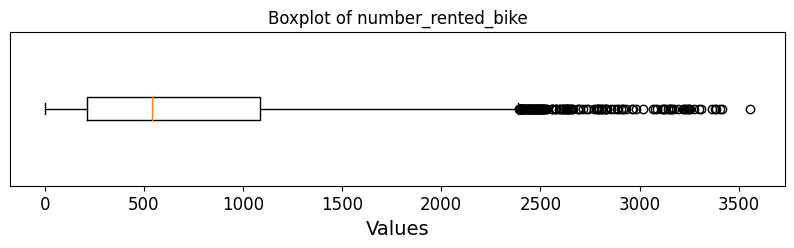

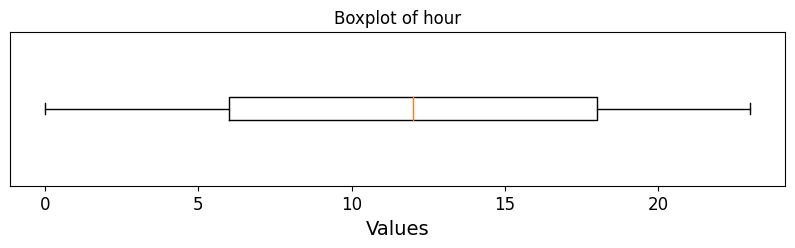

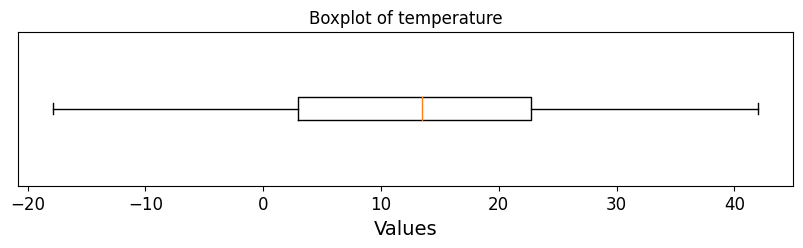

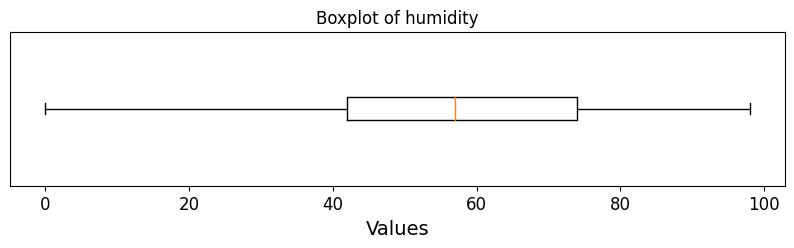

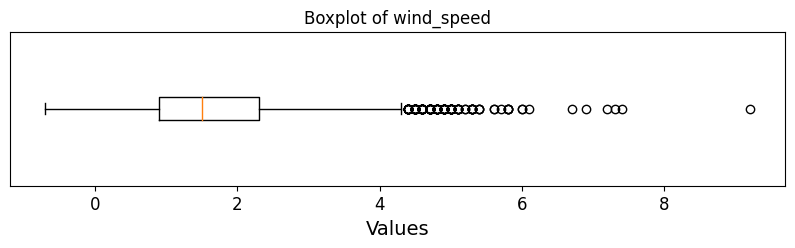

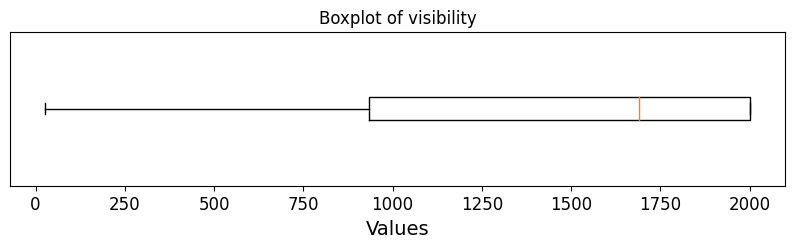

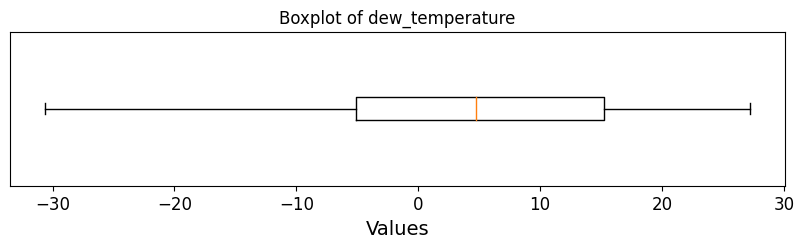

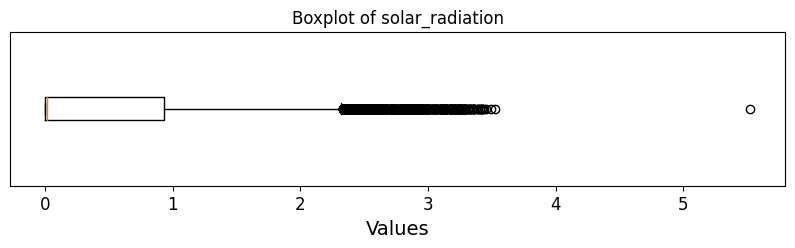

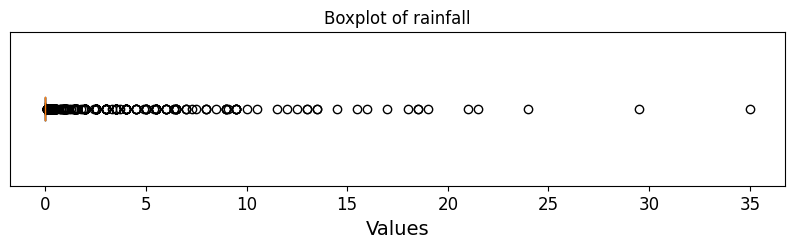

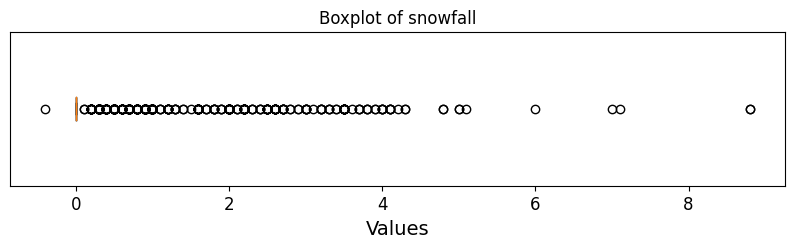

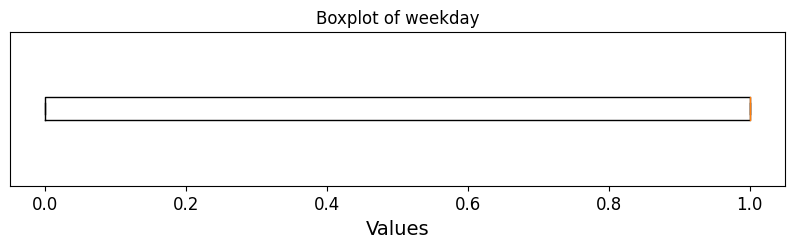

In [29]:
# visualise outliers
for col in cleaned_bike.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 2))
    plt.boxplot(bike_data[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')
    plt.yticks([])
    plt.show()